In [39]:
import pandas as pd
import locale
import matplotlib.pyplot as plt

df = pd.read_csv('data/df_analise.csv').set_index('Data')
df

,Dolar,IBOVESPA,IPCA,IGPM,IGPDI,IGP10,INPC
Data,,,,,,,
fev/2010,-3.572001,1.683435,0.78,1.18,1.09,1.08,0.70
mar/2010,-1.411957,5.817783,0.52,0.94,0.63,1.10,0.71
abr/2010,-2.909296,-4.038538,0.57,0.77,0.72,0.63,0.73
mai/2010,4.957478,-6.638531,0.43,1.19,1.57,1.11,0.43
jun/2010,-1.295192,-3.348296,0.00,0.85,0.34,1.30,-0.11
...,...,...,...,...,...,...,...
ago/2024,0.295836,6.542788,-0.02,0.29,0.12,0.72,-0.14
set/2024,-3.456118,-3.079321,0.44,0.62,1.03,0.18,0.48
out/2024,6.057206,-1.595406,0.56,1.52,1.54,1.34,0.61


In [40]:
locale.setlocale(locale.LC_TIME, 'pt_BR.UTF-8')
df.index = pd.to_datetime(df.index, format='%b/%Y')

In [47]:
df.loc['2020-01-01']

Dolar       5.640074
IBOVESPA   -1.899728
IPCA        0.210000
IGPM        0.480000
IGPDI       0.090000
IGP10       1.070000
INPC        0.190000
Name: 2020-01-01 00:00:00, dtype: float64

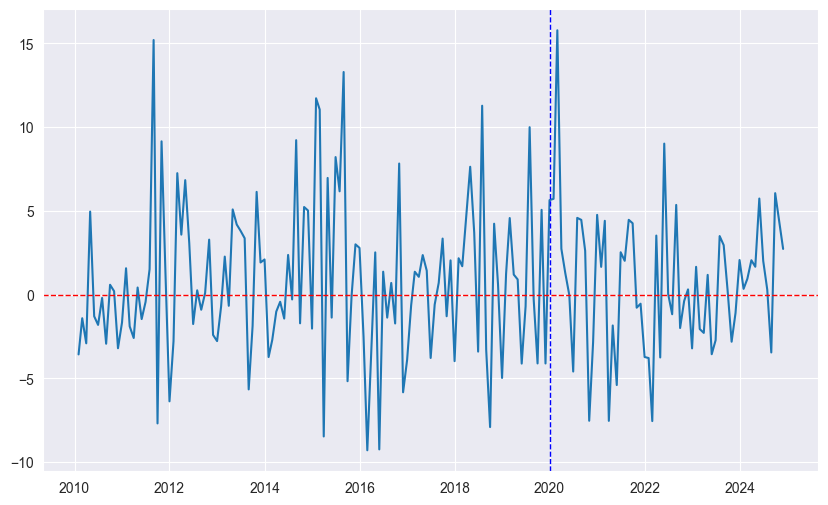

In [50]:
plt.figure(figsize=(10,6))
plt.plot(df['Dolar'])
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2020-01-01'), color='blue', linestyle='--', linewidth=1)
plt.show()

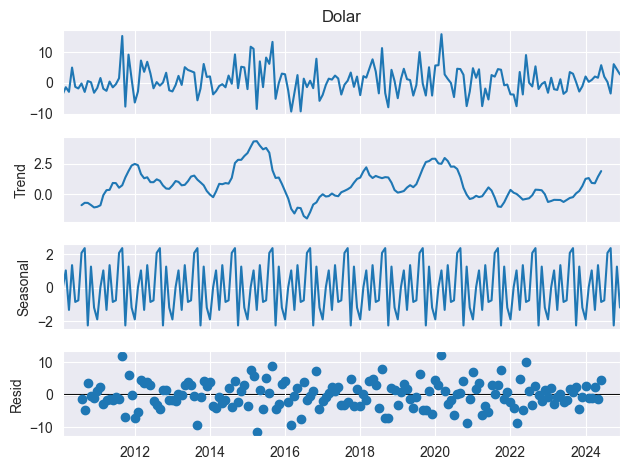

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Dolar'], model='additive', period=12)
result.plot()
plt.show()